### Objective:


1. The goal is designing two AI models, one deep model and one ensemble model, based on training data and predicting target values during the test set.
2. To predict the values for the test data 



### Data Set info:

1. Different features are given to you and some of them are given by an external source and some are artificially calculated by our data processing module. 
2. Feature Date column the data is in date and time 
3. In the remaining features Hour , Weekday, IsWorkingDay were ordinal and nominal classes
4. Rest all the columns are numerical, which is continuous data.

In [1]:
#Importing Base Libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing Data

rawdata = pd.read_excel("Training Set.xlsx")

In [3]:
rawdata.shape, rawdata.dtypes

((7584, 13),
 Date                   datetime64[ns]
 Hour                            int64
 Weekday                         int64
 Is Working Day                  int64
 Previous Hour Price           float64
 SDSH DAP                      float64
 SDSH Volume                   float64
 Sgn0 VolumeDir                float64
 P24HA Price                   float64
 PDSH Price                    float64
 PWSH Price                    float64
 PWA Price                     float64
 target                        float64
 dtype: object)

In [4]:
rawdata.isnull().sum()

Date                   0
Hour                   0
Weekday                0
Is Working Day         0
Previous Hour Price    0
SDSH DAP               0
SDSH Volume            0
Sgn0 VolumeDir         0
P24HA Price            0
PDSH Price             0
PWSH Price             0
PWA Price              0
target                 0
dtype: int64

In [5]:
# Removing Date Column
del rawdata['Date']
rawdata.columns

Index(['Hour', 'Weekday', 'Is Working Day', 'Previous Hour Price', 'SDSH DAP',
       'SDSH Volume', 'Sgn0 VolumeDir', 'P24HA Price', 'PDSH Price',
       'PWSH Price', 'PWA Price', 'target'],
      dtype='object')

In [6]:
rawdata[['Hour','Weekday','Is Working Day']] = rawdata[['Hour','Weekday','Is Working Day']].astype('category')

<AxesSubplot:>

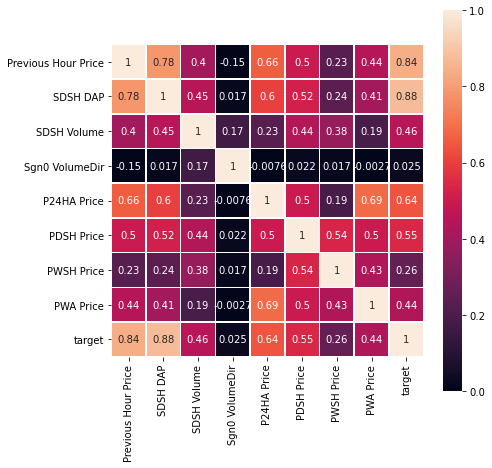

In [7]:
fig,ax = plt.subplots(figsize = (7,7))
sns.heatmap(rawdata.corr(), vmin=0, vmax=1, square=True, annot=True, linewidths=.5)

Previous Hour Price & SDSH DAP are having very good relation with Target variable

Other variables are having some decent correlation co-efficient value with Target Variable 

Sgn0 VolumeDir has least correlation on target variable though we drop this variable it may not show much of a change

In [8]:
rawdata.head()

,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,target
0,1,4,7,2400.41,2479.45,1383.7,-100.7,3654.911667,2473.00,1837.47,2296.059524,2475.68
1,2,4,7,2475.68,2494.00,1339.3,-44.4,3655.023333,2459.38,1434.83,2299.858393,2484.40
2,3,4,7,2484.40,2474.85,1309.4,-29.9,3656.065833,2370.61,1498.33,2306.105833,2486.89
3,4,4,7,2486.89,2478.66,1294.7,-14.7,3660.910833,2021.43,1462.42,2311.990119,2533.42
4,5,4,7,2533.42,2809.63,1361.4,66.7,3682.243750,2176.48,1455.85,2318.365119,2850.75


In [9]:
x = rawdata.drop('target', axis=1)
y = rawdata['target']

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer

In [11]:
numeric_trans = Pipeline(steps=[('num_imputer', SimpleImputer(strategy = 'mean')),('scaler',StandardScaler())])
categ_trans = Pipeline(steps=[('cat_imputer', SimpleImputer(strategy = 'most_frequent')),('oh',OneHotEncoder())])

In [12]:
num_features = ['Previous Hour Price', 'SDSH DAP','SDSH Volume', 
                'Sgn0 VolumeDir', 'P24HA Price', 'PDSH Price','PWSH Price', 
                'PWA Price']

cat_features = ['Hour', 'Weekday', 'Is Working Day']

In [13]:
preprocess = ColumnTransformer(transformers = [('num',numeric_trans,num_features),
                                              ('cat',categ_trans,cat_features)],remainder = "passthrough")

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

## Model1  -  Ensemble

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
rf_model = Pipeline(steps=[('preprocess', preprocess),('regressor',RandomForestRegressor())])

In [18]:
rf_model.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Previous Hour Price',
                                                   'SDSH DAP', 'SDSH Volume',
                                                   'Sgn0 VolumeDir',
                                                   'P24HA Price', 'PDSH Price',
                                                   'PWSH Price', 'PWA Price']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',


In [20]:
predictions = rf_model.predict(x_test)

In [21]:
print(mean_squared_error(y_test,predictions))
print(r2_score(y_test,predictions))

387072.2482179373
0.8468918285565006


### Tuning

In [22]:
rftune_model = Pipeline(steps=[('preprocess', preprocess),('regressor',RandomForestRegressor())])
sorted(rftune_model.get_params().keys())

['memory',
 'preprocess',
 'preprocess__cat',
 'preprocess__cat__cat_imputer',
 'preprocess__cat__cat_imputer__add_indicator',
 'preprocess__cat__cat_imputer__copy',
 'preprocess__cat__cat_imputer__fill_value',
 'preprocess__cat__cat_imputer__missing_values',
 'preprocess__cat__cat_imputer__strategy',
 'preprocess__cat__cat_imputer__verbose',
 'preprocess__cat__memory',
 'preprocess__cat__oh',
 'preprocess__cat__oh__categories',
 'preprocess__cat__oh__drop',
 'preprocess__cat__oh__dtype',
 'preprocess__cat__oh__handle_unknown',
 'preprocess__cat__oh__sparse',
 'preprocess__cat__steps',
 'preprocess__cat__verbose',
 'preprocess__n_jobs',
 'preprocess__num',
 'preprocess__num__memory',
 'preprocess__num__num_imputer',
 'preprocess__num__num_imputer__add_indicator',
 'preprocess__num__num_imputer__copy',
 'preprocess__num__num_imputer__fill_value',
 'preprocess__num__num_imputer__missing_values',
 'preprocess__num__num_imputer__strategy',
 'preprocess__num__num_imputer__verbose',
 'prepro

In [23]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'regressor__n_estimators': n_estimators,
               'regressor__max_features': max_features,
               'regressor__max_depth': max_depth,
               'regressor__min_samples_split': min_samples_split,
               'regressor__min_samples_leaf': min_samples_leaf,
               'regressor__bootstrap': bootstrap}

In [24]:
from pprint import pprint
pprint(random_grid)

{'regressor__bootstrap': [True, False],
 'regressor__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'regressor__max_features': ['auto', 'sqrt'],
 'regressor__min_samples_leaf': [1, 2, 4],
 'regressor__min_samples_split': [2, 5, 10],
 'regressor__n_estimators': [200,
                             400,
                             600,
                             800,
                             1000,
                             1200,
                             1400,
                             1600,
                             1800,
                             2000]}


In [25]:
rf_random = RandomizedSearchCV(estimator = rftune_model, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [26]:
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               Pipeline(steps=[('num_imputer',
                                                                                                SimpleImputer()),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Previous '
                                                                                'Hour '
                                                                                'Price',
                       

In [27]:
predictions2 = rf_random.predict(x_test)

In [28]:
print(mean_squared_error(y_test,predictions2))
print(r2_score(y_test,predictions2))

375993.48225611786
0.8512740843396887


In [29]:
test = pd.read_excel("Test Set.xlsx")

In [30]:
test1 = test.iloc[:,1:12]

In [31]:
test1.head()

,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price
0,1,5,5,1501.96,1501.70,1563.7,-50.6,1622.125000,1513.71,593.880,1458.818810
1,2,5,5,1475.95,1508.89,1522.3,-41.4,1620.551667,1487.63,1004.500,1464.069226
2,3,5,5,1479.86,1379.23,1468.5,-53.8,1620.227917,1368.59,1025.598,1466.898750
3,4,5,5,1484.50,1335.80,1443.3,-25.2,1625.057500,1321.87,1046.696,1469.630310
4,5,5,5,1318.03,1329.68,1445.1,1.8,1624.897500,1317.43,1067.794,1471.245393


In [32]:
test['target'] = rf_random.predict(test1)

In [33]:
test.head()

,Date,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,target
0,2020-11-19 00:00:00,1,5,5,1501.96,1501.70,1563.7,-50.6,1622.125000,1513.71,593.880,1458.818810,1494.359443
1,2020-11-19 01:00:00,2,5,5,1475.95,1508.89,1522.3,-41.4,1620.551667,1487.63,1004.500,1464.069226,1487.492081
2,2020-11-19 02:00:00,3,5,5,1479.86,1379.23,1468.5,-53.8,1620.227917,1368.59,1025.598,1466.898750,1402.838306
3,2020-11-19 03:00:00,4,5,5,1484.50,1335.80,1443.3,-25.2,1625.057500,1321.87,1046.696,1469.630310,1403.136369
4,2020-11-19 04:00:00,5,5,5,1318.03,1329.68,1445.1,1.8,1624.897500,1317.43,1067.794,1471.245393,1351.096509


In [35]:
test.to_csv("Test_set_Predictions.csv")

## Model2-Deep Learning

In [36]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

Using TensorFlow backend.


In [37]:
import keras
keras.__version__

'2.3.1'

In [38]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(47, input_dim = 47, kernel_initializer='normal', activation='relu'))
    model.add(Dense(23, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [39]:
dl_model = Pipeline(steps=[('preprocess', preprocess),('regressor',KerasRegressor(build_fn=baseline_model, epochs=10, batch_size=5, verbose=0))])

In [40]:
dl_model.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Previous Hour Price',
                                                   'SDSH DAP', 'SDSH Volume',
                                                   'Sgn0 VolumeDir',
                                                   'P24HA Price', 'PDSH Price',
                                                   'PWSH Price', 'PWA Price']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',


In [41]:
predictions3 = dl_model.predict(x_test)

In [42]:
print(mean_squared_error(y_test,predictions3))
print(r2_score(y_test,predictions3))

407942.7970832603
0.8386363889363688


## Overview

* For the given data checked for missing values , no missing values are found either of the columns

### Feature Engineering

* Feature Date column dropped as it does not have any importance over prediction of target
* In the remaining features Hour , Weekday, IsWorkingDay converted to categorical as they were ordinal and nominal classes
* Correlation checked for target variable for the remaining numeric features
    1. Previous Hour Price & SDSH DAP are having very good relation with Target variable
    2. Other variables are having some decent correlation co-efficient value with Target Variable
    3. Sgn0 VolumeDir has least correlation on target variable though we drop this variable it may not show much of a change
* Considered all the variables for modeling as all the variables having good relation with target
* Seperated Target and Inputs, Taken train and test split of the data for the machine learning model
* Applied pipeline methods for numerical and categorical features along with modeling

##### Applied Ensemble model and Deep learning model on Train Data and Predictions on Test Data for the Regression

* Comparing two model performances we can see that Randomforest giving better R2_score and MSE compared to other..so applied tuning methods on randomforest
